# Задание
1. Для пользовательских и/или модельных данных реализовать Гауссовский наивный байесовский классификатор.

2. Для несбалансированных пользовательских и/или модельных данных реализовать дополненный наивный байесовский классификатор.

3. Для пользовательских и/или модельных данных реализовать мультиномиальный наивный байесовский классификатор.

4. Для пользовательских и/или модельных данных реализовать наивный байесовский классификатор Бернулли.

# Загрузка данных, предобработка

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
df = pd.read_csv('xAPI-Edu-Data.csv')
df.head(2)
from sklearn.preprocessing import LabelEncoder
Features = df.drop('Class',axis=1)
Target = df['Class']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=52)

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


## Гауссовский наивный байесовский классификатор

In [7]:
#Гауссовский наивный байесовский классификатор (Gaussian Naive Bayes) является одним из вариантов наивного байесовского классификатора, 
#который предполагает,
#что распределение признаков для каждого класса является многомерным нормальным (гауссовским) распределением.
# Создать и обучить модель наивного байесовского классификатора
model = GaussianNB()
model.fit(X_train, y_train)

# Применить модель для предсказания меток классов на тестовом наборе данных
y_pred = model.predict(X_test)

# Рассчитать метрики модели
accuracy_baec = accuracy_score(y_test, y_pred)

# Вывести результаты
print("Accuracy:", accuracy_baec)

Accuracy: 0.8125


## Дополненный наивный байесовский классификатор

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score
model = ComplementNB()
model.fit(X_train, y_train)

# Применить модель для предсказания меток классов на тестовом наборе данных
y_pred = model.predict(X_test)

# Рассчитать метрики модели
accuracy_dop_baec = accuracy_score(y_test, y_pred)


# Вывести результаты
print("Accuracy:", accuracy_dop_baec)

Accuracy: 0.5208333333333334


## Мультиномиальный наивный байесовский классификатор.

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Создать и обучить модель мультиномиального наивного байесовского классификатора
model = MultinomialNB()
model.fit(X_train, y_train)

# Применить модель для предсказания меток классов на тестовом наборе данных
y_pred = model.predict(X_test)

# Рассчитать метрики модели
accuracy_multi_naiv_baes = accuracy_score(y_test, y_pred)

# Вывести результаты
print("Accuracy:", accuracy_multi_naiv_baes)

Accuracy: 0.5520833333333334


## Наивный байесовский классификатор Бернулли

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
# Создать и обучить модель наивного байесовского классификатора Бернулли
model = BernoulliNB()
model.fit(X_train, y_train)

# Применить модель для предсказания меток классов на тестовом наборе данных
y_pred = model.predict(X_test)

# Рассчитать метрики модели
accuracy_bernulli = accuracy_score(y_test, y_pred)

# Вывести результаты
print("Accuracy:", accuracy_bernulli)

Accuracy: 0.6875


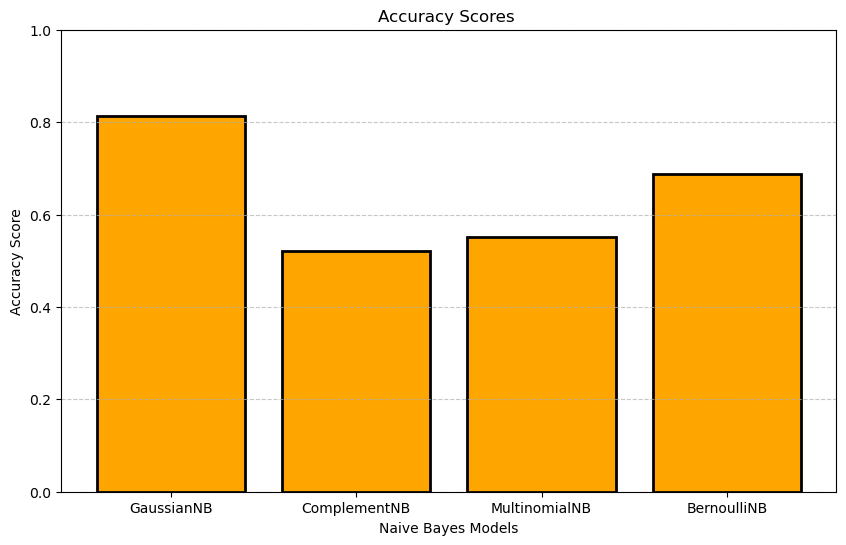

In [20]:
models = {
    'GaussianNB': accuracy_baec, # Гауссовский наивный байесовский классификатор
    'ComplementNB': accuracy_dop_baec, # Дополненный наивный байесовский классификатор
    'MultinomialNB': accuracy_multi_naiv_baes, # Мультиномиальный наивный байесовский классификатор
    'BernoulliNB': accuracy_bernulli # Наивный байесовский классификатор Бернулли
}

import matplotlib.pyplot as plt

# Визуализация accuracy_score
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), models.values(), color='orange', edgecolor='black', linewidth=2)
plt.title('Accuracy Scores ')
plt.xlabel('Naive Bayes Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # установить предел по оси y от 0 до 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
